In [1]:
import os
import math

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from simple_linear_auto_encoder import SimpleLinearAutoencoder
from FastaDataset import FastaDataset

%load_ext autoreload
%autoreload 2


In [2]:
fd = FastaDataset("data/uniprot_database_type_PDB.fasta", pad_mode='end')
n_inputs = fd.__len__()
input_size = fd.get_max_length()
print(n_inputs, input_size)

49255 34350


In [3]:
batch_size = 50
n_batches = math.ceil(n_inputs/batch_size)
lr = .01

In [4]:
dataloader = DataLoader(fd, batch_size=batch_size,
                        shuffle=True, num_workers=1)

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
model = SimpleLinearAutoencoder(input_size=input_size)
model.to(device)
print(model)

SimpleLinearAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=34350, out_features=784, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=784, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=32, out_features=16, bias=True)
    (11): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=256, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features

In [7]:
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [8]:
def train():
    total_loss = 0.0
    for batch_no, embedding in enumerate(dataloader):
        embedding = embedding.to(device)
        embedding = embedding.view(embedding.size(0), -1)
        optimizer.zero_grad()
        out, latent_vector = model(embedding)
        loss = criterion(out, embedding)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        if (batch_no+1) % 100 == 0:
            print("|{}/{:.0f} batch running | loss: {:.5f}|"
                  .format(batch_no+1, n_batches, total_loss/((batch_no+1) * batch_size)))
    
    return total_loss/n_inputs
    

In [9]:
# train()

|100/986 batch running | loss: 0.00311|
|200/986 batch running | loss: 0.00313|
|300/986 batch running | loss: 0.00309|
|400/986 batch running | loss: 0.00310|
|500/986 batch running | loss: 0.00307|
|600/986 batch running | loss: 0.00307|
|700/986 batch running | loss: 0.00307|
|800/986 batch running | loss: 0.00307|
|900/986 batch running | loss: 0.00307|
|100/986 batch running | loss: 0.00307|
|200/986 batch running | loss: 0.00301|
|300/986 batch running | loss: 0.00302|
|400/986 batch running | loss: 0.00301|
|500/986 batch running | loss: 0.00304|
|600/986 batch running | loss: 0.00303|
|700/986 batch running | loss: 0.00304|
|800/986 batch running | loss: 0.00303|
|900/986 batch running | loss: 0.00303|
|100/986 batch running | loss: 0.00304|
|200/986 batch running | loss: 0.00303|
|300/986 batch running | loss: 0.00301|
|400/986 batch running | loss: 0.00301|
|500/986 batch running | loss: 0.00302|
|600/986 batch running | loss: 0.00302|
|700/986 batch running | loss: 0.00303|


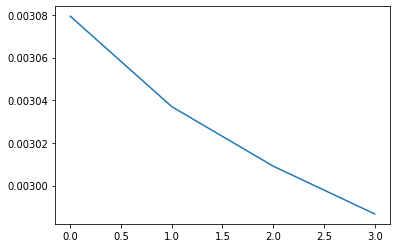

|100/986 batch running | loss: 0.00306|
|200/986 batch running | loss: 0.00297|
|300/986 batch running | loss: 0.00296|
|400/986 batch running | loss: 0.00297|
|500/986 batch running | loss: 0.00297|
|600/986 batch running | loss: 0.00297|
|700/986 batch running | loss: 0.00298|
|800/986 batch running | loss: 0.00297|
|900/986 batch running | loss: 0.00297|
|100/986 batch running | loss: 0.00305|
|200/986 batch running | loss: 0.00298|
|300/986 batch running | loss: 0.00298|
|400/986 batch running | loss: 0.00298|
|500/986 batch running | loss: 0.00296|
|600/986 batch running | loss: 0.00296|
|700/986 batch running | loss: 0.00295|
|800/986 batch running | loss: 0.00296|
|900/986 batch running | loss: 0.00295|
|100/986 batch running | loss: 0.00295|
|200/986 batch running | loss: 0.00298|
|300/986 batch running | loss: 0.00292|
|400/986 batch running | loss: 0.00292|
|500/986 batch running | loss: 0.00292|
|600/986 batch running | loss: 0.00291|
|700/986 batch running | loss: 0.00291|


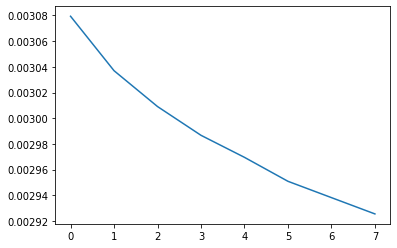

|100/986 batch running | loss: 0.00288|
|200/986 batch running | loss: 0.00289|
|300/986 batch running | loss: 0.00289|
|400/986 batch running | loss: 0.00289|
|500/986 batch running | loss: 0.00290|
|600/986 batch running | loss: 0.00292|
|700/986 batch running | loss: 0.00291|
|800/986 batch running | loss: 0.00292|
|900/986 batch running | loss: 0.00292|
|100/986 batch running | loss: 0.00284|
|200/986 batch running | loss: 0.00291|
|300/986 batch running | loss: 0.00293|
|400/986 batch running | loss: 0.00293|
|500/986 batch running | loss: 0.00292|
|600/986 batch running | loss: 0.00291|
|700/986 batch running | loss: 0.00291|
|800/986 batch running | loss: 0.00292|
|900/986 batch running | loss: 0.00292|
|100/986 batch running | loss: 0.00289|
|200/986 batch running | loss: 0.00288|
|300/986 batch running | loss: 0.00287|
|400/986 batch running | loss: 0.00291|
|500/986 batch running | loss: 0.00292|
|600/986 batch running | loss: 0.00292|
|700/986 batch running | loss: 0.00292|


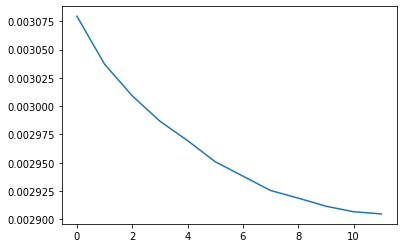

|100/986 batch running | loss: 0.00292|
|200/986 batch running | loss: 0.00291|
|300/986 batch running | loss: 0.00289|
|400/986 batch running | loss: 0.00290|
|500/986 batch running | loss: 0.00291|
|600/986 batch running | loss: 0.00290|
|700/986 batch running | loss: 0.00290|
|800/986 batch running | loss: 0.00290|
|900/986 batch running | loss: 0.00290|
|100/986 batch running | loss: 0.00288|
|200/986 batch running | loss: 0.00292|
|300/986 batch running | loss: 0.00293|
|400/986 batch running | loss: 0.00292|
|500/986 batch running | loss: 0.00292|
|600/986 batch running | loss: 0.00291|
|700/986 batch running | loss: 0.00292|
|800/986 batch running | loss: 0.00292|
|900/986 batch running | loss: 0.00291|
|100/986 batch running | loss: 0.00290|
|200/986 batch running | loss: 0.00290|
|300/986 batch running | loss: 0.00290|
|400/986 batch running | loss: 0.00291|
|500/986 batch running | loss: 0.00291|
|600/986 batch running | loss: 0.00290|
|700/986 batch running | loss: 0.00289|


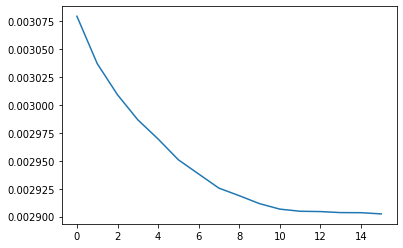

|100/986 batch running | loss: 0.00290|
|200/986 batch running | loss: 0.00289|
|300/986 batch running | loss: 0.00290|
|400/986 batch running | loss: 0.00288|
|500/986 batch running | loss: 0.00289|
|600/986 batch running | loss: 0.00288|
|700/986 batch running | loss: 0.00290|
|800/986 batch running | loss: 0.00290|
|900/986 batch running | loss: 0.00290|
|100/986 batch running | loss: 0.00298|
|200/986 batch running | loss: 0.00292|
|300/986 batch running | loss: 0.00290|
|400/986 batch running | loss: 0.00288|
|500/986 batch running | loss: 0.00288|
|600/986 batch running | loss: 0.00288|
|700/986 batch running | loss: 0.00289|
|800/986 batch running | loss: 0.00289|
|900/986 batch running | loss: 0.00290|
|100/986 batch running | loss: 0.00292|
|200/986 batch running | loss: 0.00285|
|300/986 batch running | loss: 0.00285|
|400/986 batch running | loss: 0.00287|
|500/986 batch running | loss: 0.00289|
|600/986 batch running | loss: 0.00289|
|700/986 batch running | loss: 0.00290|


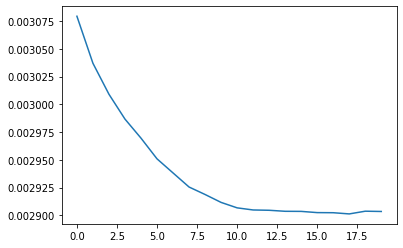

In [10]:
all_losses = []
n_epochs = 20
print_every = 4
draw_every = 4
for epoch in range(1, n_epochs+1):
    loss = train()
    all_losses.append(loss)
    
    if epoch % print_every == 0:
        print('='*100)
        print("{}/{} epochs | loss: {:.5f}".format(epoch, n_epochs, loss))
        print('='*100)
    
    if epoch % draw_every == 0:
        plt.plot(all_losses)
        plt.show()